In [11]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#11ff66','#9933ff','Lobster','Aladin',30,14
def dhtml(string,font_color=c1,font_family=f1,font_size=fs1):
    display(HTML("""
    <style>@import 'https://fonts.googleapis.com/css?family="""\
    +font_family+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font_family+"""; 
    color:"""+font_color+"""; font-size:"""+str(font_size)+"""px;'>
    %s</h1>"""%string))

In [12]:
dhtml('Code Modules, Setting, & Functions')

In [13]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl,pandas as pd,numpy as np
import scipy.signal as sps,skimage.measure as skm
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku
from IPython.core.magic import register_line_magic
pd.set_option('precision',3)
tf.keras.backend.set_floatx('float64')

In [14]:
dhtml('Conv1d Exploration')

In [15]:
num_w,num_x=4,7 #num_w>3!
w=np.random.random(num_w)
x=np.random.random(num_x)

In [16]:
w_rotated=np.array(w[::-1])
pd.DataFrame([w,w_rotated],index=['w','w_rotated'])\
.style.background_gradient(cmap='cool',axis=1)

,0,1,2,3
w,0.111,0.228,0.053,0.441
w_rotated,0.441,0.053,0.228,0.111


In [17]:
def conv_step(x,i):
    y=np.dot(x[i:i+len(w)],w_rotated)
    display(pd.DataFrame(
        [x,i*[np.nan]+list(w_rotated),i*[np.nan]+[y]],
        index=['x','w_rotated','y'])\
        .style.bar(align='mid',color=c2,
                   subset=list(range(i,i+len(w))))\
        .set_properties(**{'max-width':'60px'}))  
for i in range(len(x)-len(w)+1): conv_step(x,i)

,0,1,2,3,4,5,6
x,0.401,0.762,0.124,0.221,0.370,0.024,0.500
w_rotated,0.441,0.053,0.228,0.111,nan,nan,nan
y,0.270,nan,nan,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.401,0.762,0.124,0.221,0.370,0.024,0.500
w_rotated,nan,0.441,0.053,0.228,0.111,nan,nan
y,nan,0.434,nan,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.401,0.762,0.124,0.221,0.370,0.024,0.500
w_rotated,nan,nan,0.441,0.053,0.228,0.111,nan
y,nan,nan,0.153,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.401,0.762,0.124,0.221,0.370,0.024,0.500
w_rotated,nan,nan,nan,0.441,0.053,0.228,0.111
y,nan,nan,nan,0.178,nan,nan,nan


In [18]:
def conv1d(x,w,p,s):
    w_rotated=np.array(w[::-1])
    x_padded=np.array(x)
    w_length=w_rotated.shape[0]
    x_length=x_padded.shape[0]+p*2
    if p>0:
        zero_pad=np.zeros(shape=p)
        x_padded=np.concatenate([zero_pad,x_padded,zero_pad])
    xw_str='x: <br/>'+str(x)+'<br/>padded x: </br>'+str(x_padded)+\
           '<br/>w: <br/>'+str(w)+'<br/>rotated w: <br/>'+str(w_rotated)
    dhtml(xw_str,c2,f2,fs2)
    result=[]; steps=int((x_length-w_length)/s)+w_length%2
    for i in range(0,steps,s):
        result.append(np.sum(x_padded[i:i+w_length]*w_rotated))
    return np.array(result)
pd.DataFrame(
    [conv1d(x,w,p=2,s=1),np.convolve(x,w,mode='same')],
    index=['conv1d','numpy convolve'])\
.style.background_gradient(cmap='cool',axis=1)\
.set_properties(**{'max-width':'50px'})

,0,1,2,3,4,5,6
conv1d,0.176,0.209,0.270,0.434,0.153,0.178,0.278
numpy convolve,0.176,0.209,0.270,0.434,0.153,0.178,0.278


In [19]:
pd.DataFrame([x,w]+[np.convolve(x,w,mode=m) 
             for m in ['full','same','valid']])\
.style.background_gradient(cmap='cool',axis=1)\
.set_properties(**{'max-width':'50px'})

,0,1,2,3,4,5,6,7,8,9
0,0.401,0.762,0.124,0.221,0.370,0.024,0.500,nan,nan,nan
1,0.111,0.228,0.053,0.441,nan,nan,nan,nan,nan,nan
2,0.044,0.176,0.209,0.270,0.434,0.153,0.178,0.278,0.037,0.220
3,0.176,0.209,0.270,0.434,0.153,0.178,0.278,nan,nan,nan
4,0.270,0.434,0.153,0.178,nan,nan,nan,nan,nan,nan


In [ ]:
dhtml('Conv2d Exploration')

In [20]:
num_X=6; p=[1,1]
X=np.random.random([num_X,num_X])
n1=X.shape[0]+2*p[0]
n2=X.shape[1]+2*p[1]
X_padded=np.zeros(shape=(n1,n2))
X_padded[p[0]:p[0]+X.shape[0],
         p[1]:p[1]+X.shape[1]]=X
pd.DataFrame(X_padded)\
.style.background_gradient(cmap='cool',axis=1)\
.set_properties(**{'max-width':'50px','height':'50px'})

,0,1,2,3,4,5,6,7
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.619,0.352,0.970,0.859,0.177,0.926,0.000
2,0.000,0.284,0.439,0.987,0.587,0.737,0.007,0.000
3,0.000,0.844,0.303,0.827,0.455,0.269,0.233,0.000
4,0.000,0.332,0.423,0.149,0.237,0.455,0.739,0.000
5,0.000,0.095,0.312,0.827,0.536,0.280,0.829,0.000
6,0.000,0.910,0.544,0.571,0.600,0.412,0.084,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [21]:
num_W=3
W=np.random.random([num_W,num_W])
W_rotated=np.array(W)[::-1,::-1]
for m in [W,W_rotated]:
    display(pd.DataFrame(m)\
    .style.background_gradient(cmap='cool',axis=1)\
    .set_properties(**{'max-width':'50px','height':'50px'}))

,0,1,2
0,0.090,0.295,0.605
1,0.121,0.848,0.092
2,0.588,0.876,0.729


,0,1,2
0,0.729,0.876,0.588
1,0.092,0.848,0.121
2,0.605,0.295,0.090


In [22]:
X0=X_padded[:num_W,:num_W]
Y0=round(np.sum(X0*W_rotated),9)
for m in [X0,W_rotated]:
    display(pd.DataFrame(m)\
    .style.background_gradient(cmap='cool',axis=1)\
    .set_properties(**{'max-width':'50px','height':'50px'}))
dhtml(7*'&#x21e3;'+'<br/>'+str(Y0))

,0,1,2
0,0.000,0.000,0.000
1,0.000,0.619,0.352
2,0.000,0.284,0.439


,0,1,2
0,0.729,0.876,0.588
1,0.092,0.848,0.121
2,0.605,0.295,0.090


In [23]:
def conv2d(X,W,p,s):
    W_rotated=np.array(W)[::-1,::-1]
    n1=X.shape[0]+2*p[0]
    n2=X.shape[1]+2*p[1]
    X_padded=np.zeros(shape=(n1,n2))
    X_padded[p[0]:p[0]+X.shape[0],
    p[1]:p[1]+X.shape[1]]=X
    result=[]
    l=(int((X_padded.shape[0]-W_rotated.shape[0])/s[0])+1,
       int((X_padded.shape[1]-W_rotated.shape[1])/s[1])+1)
    for i in range(0,l[0],s[0]):
        result.append([])
        for j in range(0,l[1],s[1]):
            X_sub=X_padded[i:i+W_rotated.shape[0],
                           j:j+W_rotated.shape[1]]
            result[-1].append(np.sum(X_sub*W_rotated))
    return(np.array(result))

In [24]:
for el in [conv2d(X,W,p=(1,1),s=(1,1)),
           sps.convolve2d(X,W,mode='same')]:
    display(pd.DataFrame(el)\
            .style.background_gradient(cmap='cool',axis=1)\
            .set_properties(**{'max-width':'50px'}))

,0,1,2,3,4,5
0,0.691,0.863,1.569,1.675,0.914,1.249
1,1.319,2.521,3.028,2.899,2.380,1.245
2,1.395,1.945,2.636,2.362,1.720,1.259
3,1.305,1.997,1.887,2.112,1.683,1.483
4,0.975,1.835,1.924,1.708,1.885,1.982
5,1.104,1.442,1.873,1.848,1.538,1.039


,0,1,2,3,4,5
0,0.691,0.863,1.569,1.675,0.914,1.249
1,1.319,2.521,3.028,2.899,2.380,1.245
2,1.395,1.945,2.636,2.362,1.720,1.259
3,1.305,1.997,1.887,2.112,1.683,1.483
4,0.975,1.835,1.924,1.708,1.885,1.982
5,1.104,1.442,1.873,1.848,1.538,1.039


In [25]:
dhtml('Pooling Exploration')

In [26]:
pool_size=3
for [i,j] in [[0,0],[0,1],[1,0],[1,1]]:
    display(pd.DataFrame(
        X[i*pool_size:(i+1)*pool_size,
        j*pool_size:(j+1)*pool_size])\
        .style.highlight_max(color=c2,axis=None)\
        .set_properties(**{'max-width':'50px','height':'50px'}))

,0,1,2
0,0.619,0.352,0.970
1,0.284,0.439,0.987
2,0.844,0.303,0.827


,0,1,2
0,0.859,0.177,0.926
1,0.587,0.737,0.007
2,0.455,0.269,0.233


,0,1,2
0,0.332,0.423,0.149
1,0.095,0.312,0.827
2,0.910,0.544,0.571


,0,1,2
0,0.237,0.455,0.739
1,0.536,0.280,0.829
2,0.600,0.412,0.084


In [28]:
maxp=skm.block_reduce(X,(pool_size,pool_size),np.max)
pd.DataFrame(maxp).style.bar(align='mid',color=c2)\
.set_properties(**{'max-width':'50px'})

,0,1
0,0.987,0.926
1,0.910,0.829


In [29]:
meanp=skm.block_reduce(X,(pool_size,pool_size),np.mean)
pd.DataFrame(meanp).style.bar(align='mid',color=c2)\
.set_properties(**{'max-width':'50px'})

,0,1
0,0.625,0.472
1,0.462,0.464


In [30]:
dhtml('Keras Conv1D/MaxPool1D & Conv2D/MaxPool2D')

In [31]:
@register_line_magic
def get_model_plot1d(pars):
    pars=pars.split()
    num_timesteps=int(pars[0])
    num_features=int(pars[1])
    num_filters=int(pars[2])
    ks=int(pars[3])
    ps=int(pars[4])
    model=tf.keras.Sequential()
    model.add(tkl.InputLayer(
        (num_timesteps,num_features),name='input'))
    model.add(tkl.Conv1D(
        filters=num_filters,
        kernel_size=ks,
        padding='same',name='conv1d',
        activation='relu'))
    model.add(tkl.MaxPool1D(
        pool_size=ps,name='pool1d'))
    display(tku.plot_model(model,show_shapes=True))

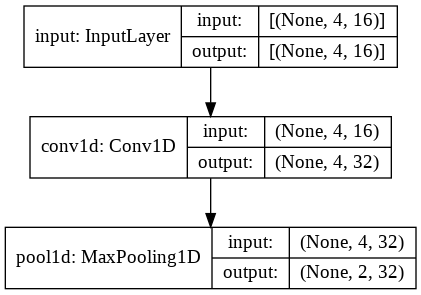

In [32]:
%get_model_plot1d 4 16 32 3 2

In [33]:
@register_line_magic
def get_model_plot2d(pars):
    pars=pars.split()
    img_size=int(pars[0])
    num_channels=int(pars[1])
    num_filters=int(pars[2])
    ks=int(pars[3])
    ps=int(pars[4])
    model=tf.keras.Sequential()
    model.add(tkl.InputLayer(
        (img_size,img_size,num_channels),name='input'))
    model.add(tkl.Conv2D(
        filters=num_filters,
        kernel_size=(ks,ks),strides=(1,1),
        padding='same',name='conv2d',
        activation='relu'))
    model.add(tkl.MaxPool2D(
        pool_size=(ps,ps),name='pool2d'))
    display(tku.plot_model(model,show_shapes=True))

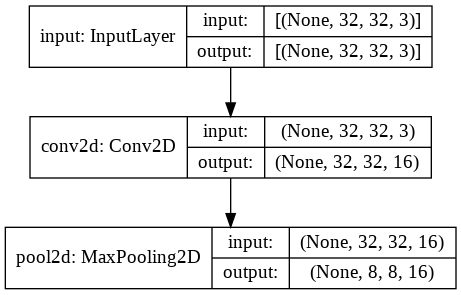

In [34]:
%get_model_plot2d 32 3 16 5 4

In [35]:
dhtml('Keras Dropout')

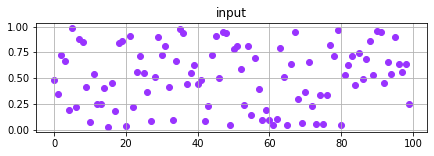

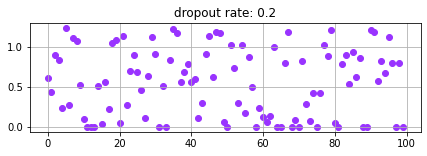

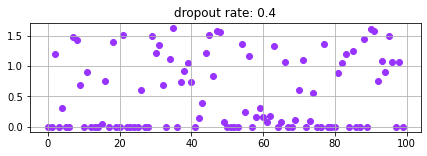

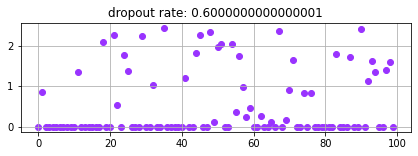

In [36]:
num_Y=100; dr=[.2*i for i in range(1,4)]
Y=np.random.random(num_Y)
pl.figure(figsize=(7,2))
pl.scatter(range(num_Y),Y,c=c2)
pl.title('input'); pl.grid(); pl.show()
for i in range(3):
    pl.figure(figsize=(7,2))
    pl.scatter(range(num_Y),
               tkl.Dropout(rate=dr[i])\
               (Y,training=True),c=c2)
    pl.title('dropout rate: '+str(dr[i]))
    pl.grid(); pl.show()